In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import math
import random

In [2]:
class StockData():
    
    def __init__(self, closing_price, date_ddmmyyyy):
        '''
        Initialize the instance with an iterable of closing_price and date_ddmmyyyy. Returns None
        
        '''
        self.closing_price= closing_price
        self.date_ddmmyyyy = date_ddmmyyyy
        return None
        
        
    def YearlyChange(self):
        '''
        This function takes closing price and date and then returns an iterable of % yaerly changes
        
        '''
        assert len(self.closing_price) == len(self.date_ddmmyyyy), 'The length of date and closing_price are not equal'
        yearly_percent_change = []
        i, j = 0, 0
        while( i < len(self.closing_price)):
            #print(i)
            #j = i
            final_closing_price = self.closing_price[i]
            while(j+1<len(self.closing_price)):
                    #print(i)
                if(self.date_ddmmyyyy[j][7:] == self.date_ddmmyyyy[j+1][7:]):
                    if(j == len(self.closing_price)):
                        pass
                    else:
                        j = j+1
                else:
                    #print(j)
                    break
                #i = j
            if (j<len(self.closing_price)-1):
                initial_closing_price = self.closing_price[j+1]
            else:
                initial_closing_price = self.closing_price[j]
            yearly_percent_change.append((final_closing_price - initial_closing_price)*100/initial_closing_price)                
            i = j+1
            j = j+1
            if(j == len(self.closing_price)-1):
                break
                  
        return yearly_percent_change
    
    
    def MonthlyChange(self):
        assert len(self.closing_price) == len(self.date_ddmmyyyy), 'The length of date and closing_price are not equal'
        monthly_percent_change = []
        i, j = 0, 0
        while( i < len(self.closing_price)):
            #print(i)
            #j = i
            final_closing_price = self.closing_price[i]
            while(j+1<len(self.closing_price)):
                    #print(i)
                if(self.date_ddmmyyyy[j][3:5] == self.date_ddmmyyyy[j+1][3:5]):
                    if(j == len(self.closing_price)):
                        pass
                    else:
                        j = j+1
                else:
                    #print(j)
                    break
                #i = j
            if (j<len(self.closing_price)-1):
                initial_closing_price = self.closing_price[j+1]
            else:
                initial_closing_price = self.closing_price[j]
            monthly_percent_change.append((final_closing_price - initial_closing_price)*100/initial_closing_price)                
            i = j+1
            j = j+1
            if(j == len(self.closing_price)-1):
                break
        return monthly_percent_change

In [3]:
df_nifty_safe_haven = pd.read_csv("C://Users/Prithvi Krishna/Documents/Safe Haven/Nifty Data for Safe Haven.csv")

In [4]:
nifty_50 = StockData(df_nifty_safe_haven['Close'], df_nifty_safe_haven['Date'])

In [5]:
len(nifty_50.MonthlyChange())

232

In [65]:
class IndexRandomWalk(StockData):
    
    def __init__(self, investment_horizon, num_of_iterations, year =1, *args):
        #assert type(self.change_data) is list, "Change Data provided is not in a list" 
        #self.change_data = change_data
        self.year = year
        self.investment_horizon = investment_horizon
        self.num_of_iterations = num_of_iterations
        super().__init__(*args)
        
    def GeometricWalkIndex(self):
        import random
        import math
        import statistics
        import numpy as np
        #final_investment = 1
        collection_iter = []
        if(self.year == 1):
            change_array = np.array(self.YearlyChange())
            for i in range(self.num_of_iterations):
                final_investment = 1
                for i in range(self.investment_horizon):
                    final_investment = final_investment*(1+ 0.01*random.choice(change_array))
            
                collection_iter.append(final_investment)
        else:
            change_array = np.array(self.MonthlyChange())
            for i in range(self.num_of_iterations):
                final_investment = 1
                for i in range(self.investment_horizon*12):
                    final_investment = final_investment*(1+ 0.01*random.choice(change_array))

                collection_iter.append(final_investment)
                
        median_final_investment = statistics.median(collection_iter)
        fifth_percentile_investment = np.percentile(np.array(collection_iter), 5)
        return collection_iter
        #return median_final_investment, fifth_percentile_investment
    
    
    def GeometricWalkIndexFixed(self, fixed_rate):
        self.fixed_rate = fixed_rate
        
        #dict_median_fifth = dict()
        median_dict = {}
        fifth_perc_dict = {}
        if(self.year == 1):
            change_array = np.array(self.YearlyChange())
            for j in range(1,101):
                collection_iter = []
                fraction = j/100
                for i in range(self.num_of_iterations):
                    final_investment = 1
                    for k in range(self.investment_horizon):
                        final_investment = final_investment* (fraction * (1+ 0.01*random.choice(change_array)) + (1-fraction)*(1+self.fixed_rate))
                    collection_iter.append(final_investment)
                median_final_investment = statistics.median(collection_iter)
                median_dict[j] = (median_final_investment)
                fifth_percentile_investment = np.percentile(np.array(collection_iter), 5)
                fifth_perc_dict[j] = (fifth_percentile_investment)
        else:
            change_array = np.array(self.MonthlyChange())
            for j in range(1,101):
                collection_iter = []
                fraction = j/100
                for i in range(self.num_of_iterations):
                    final_investment = 1
                    for k in range(12*self.investment_horizon):
                        final_investment = final_investment* (fraction * (1+ 0.01*random.choice(change_array)) + (1-fraction)*(1+self.fixed_rate))
                    collection_iter.append(final_investment)
                median_final_investment = statistics.median(collection_iter)
                median_dict[j] = median_final_investment
                fifth_percentile_investment = np.percentile(np.array(collection_iter), 5)
                fifth_perc_dict[j] = fifth_percentile_investment
        return median_dict, fifth_perc_dict
    

    
    def GeometricWalkIndexInsurance(self, payoff, index_returns_bucket):
        self.payoff = payoff
        self.index_returns_bucket = index_returns_bucket
        #GeometricWalkIndex(self):
        
        #final_investment = 1
        median_dict = {}
        fifth_perc_dict = {}
        #median_returns_list = []
        #fifth_perc_returns_list = []
        if(self.year == 1):
            change_array = np.array(self.YearlyChange())
            for j in range(1,101):
                collection_iter = []
                fraction = j/100
                for i in range(self.num_of_iterations):
                    final_investment = 1
                    for k in range(self.investment_horizon):
                        index_returns = random.choice(change_array)
                        if (index_returns <= index_returns_bucket):
                            final_investment = final_investment* (fraction * (1+ 0.01*index_returns) + (1-fraction)*(1+self.payoff* fraction))
                        else:
                            final_investment = fraction * final_investment*(1+ 0.01*index_returns)

                    collection_iter.append(final_investment)
                median_final_investment = statistics.median(collection_iter)
                median_dict[fraction] = (median_final_investment)
                #median_returns_list.append((median_final_investment)**(1/self.investment_horizon)-1)
                
                fifth_percentile_investment = np.percentile(np.array(collection_iter), 5)
                fifth_perc_dict[fraction] = (fifth_percentile_investment)
                #fifth_perc_returns_list.append((fifth_percentile_investment)**(1/self.investment_horizon)-1)
        else:
            change_array = np.array(self.MonthlyChange())
            for j in range(1,101):
                collection_iter = []
                fraction = j/100
                for i in range(self.num_of_iterations):
                    final_investment = 1
                    for k in range(self.investment_horizon*12):
                        index_returns = random.choice(change_array)
                        if (index_returns <= index_returns_bucket):
                            final_investment = final_investment* (fraction * (1+ 0.01*index_returns) + (1-fraction)*(1+self.payoff* fraction))
                        else:
                            final_investment = fraction * final_investment*(1+ 0.01*index_returns)
                    collection_iter.append(final_investment)
                median_final_investment = statistics.median(collection_iter)
                median_dict[fraction] = (median_final_investment)
                #median_returns_list.append((median_final_investment)**(1/self.investment_horizon)-1)
                
                fifth_percentile_investment = np.percentile(np.array(collection_iter), 5)
                fifth_perc_dict[fraction] = (fifth_percentile_investment)
                #fifth_perc_returns_list.append((fifth_percentile_investment)**(1/self.investment_horizon*12)-1)
        return median_dict, fifth_perc_dict #median_returns_list, fifth_perc_returns_list
    
    
    #
    #def GeometricWalkIndexInsurance
    

In [189]:
type(nifty_50.MonthlyChange()) is list

True

In [66]:
nifty_random_walk = IndexRandomWalk(25, 20000, 1, df_nifty_safe_haven['Close'], df_nifty_safe_haven['Date'])

In [67]:
index_only_wealth = nifty_random_walk.GeometricWalkIndex()

In [68]:
index_only_median_wealth = statistics.median(index_only_wealth)
index_only_fifth_perc_wealth = np.percentile(index_only_wealth, 5)
print("Median wealth: {:.3f}, Fifth percentile wealth: {:.3f}".format(index_only_median_wealth, index_only_fifth_perc_wealth))
print("Median returns Percentage: {:.3f}, Fifth percentile returns Percentage: {:.3f}".format((index_only_median_wealth**0.04-1)*100, (index_only_fifth_perc_wealth**0.04-1)*100))

Median wealth: 17.733, Fifth percentile wealth: 1.634
Median returns Percentage: 12.189, Fifth percentile returns Percentage: 1.985


In [69]:
fixed_and_index_returns = nifty_random_walk.GeometricWalkIndexFixed(0.06)

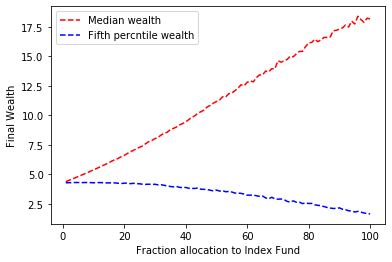

In [70]:
x_axis = list(fixed_and_index_returns[0].keys())
y_axis_median_fixed = list(fixed_and_index_returns[0].values())
y_axis_fifth_perc_fixed= list(fixed_and_index_returns[1].values())

plt.plot(x_axis, y_axis_median_fixed, 'r--')

plt.plot(x_axis, y_axis_fifth_perc_fixed, 'b--')
plt.xlabel('Fraction allocation to Index Fund')
plt.ylabel('Final Wealth')
plt.legend([ 'Median wealth', 'Fifth percntile wealth'],loc = 'upper left')

In [71]:
fixed_index_percent_median_returns = []
fixed_index_percent_fifth_returns = []
investment_horizon =25
for i in y_axis_median_fixed:
    fixed_index_percent_median_returns.append(ReturnFromWealth(i, investment_horizon))
for j in y_axis_fifth_perc_fixed:
    fixed_index_percent_fifth_returns.append(ReturnFromWealth(j, investment_horizon))

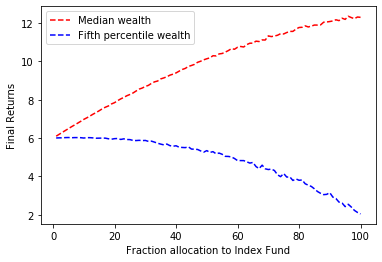

In [72]:
plt.plot(x_axis, fixed_index_percent_median_returns, 'r--')
plt.plot(x_axis, fixed_index_percent_fifth_returns, 'b--')
plt.xlabel('Fraction allocation to Index Fund')
plt.ylabel('Final Returns')
plt.legend([ 'Median wealth', 'Fifth percentile wealth'],loc = 'upper left')
plt.show()

In [55]:
#ReturnFromWealth(y_axis_median[0], 25)
y_axis_median[0]

1.7293363961654916e-42

In [36]:
insur_index_wealth = nifty_random_walk.GeometricWalkIndexInsurance(10, -10)

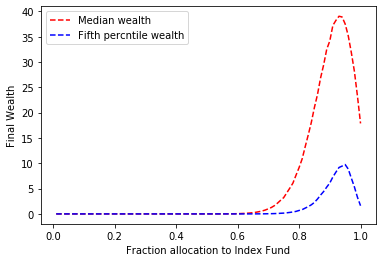

In [58]:
x_axis = list(insur_index_wealth[0].keys())
y_axis_median_insur = list(insur_index_wealth[0].values())
y_axis_fifth_perc_insur= list(insur_index_wealth[1].values())
plt.plot(x_axis, y_axis_median_insur, 'r--')

plt.plot(x_axis, y_axis_fifth_perc_insur, 'b--')
plt.xlabel('Fraction allocation to Index Fund')
plt.ylabel('Final Wealth')
plt.legend([ 'Median wealth', 'Fifth percntile wealth'],loc = 'upper left')

In [73]:
insur_index_percent_median_returns = []
insur_index_percent_fifth_returns = []
investment_horizon =25
for i in y_axis_median_insur:
    insur_index_percent_median_returns.append(ReturnFromWealth(i, investment_horizon))
for j in y_axis_fifth_perc_insur:
    insur_index_percent_fifth_returns.append(ReturnFromWealth(j, investment_horizon))

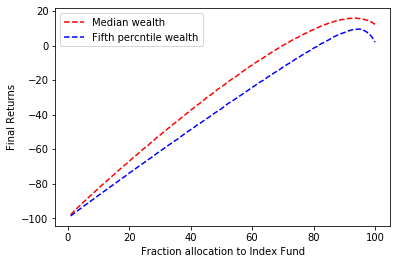

In [74]:
plt.plot(x_axis, insur_index_percent_median_returns, 'r--')

plt.plot(x_axis, insur_index_percent_fifth_returns, 'b--')
plt.xlabel('Fraction allocation to Index Fund')
plt.ylabel('Final Returns')
plt.legend([ 'Median wealth', 'Fifth percntile wealth'],loc = 'upper left')

In [44]:
#List of returns of Index only geometric walk:
def ReturnFromWealth(wealth, horizon):
    return (wealth**(1/horizon)-1)*100

In [46]:
index_only_returns_list = []
investment_horizon = 25
for i in index_only_wealth:
    index_only_returns_list.append(ReturnFromWealth(i, investment_horizon))

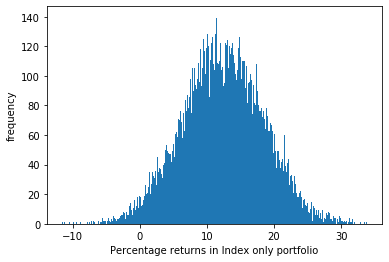

In [51]:
#Comparing with Geometric Random Walk
plt.hist(index_only_returns_list, bins= 500)
plt.xlabel('Percentage returns in Index only portfolio')
plt.ylabel('frequency')
plt.show()

In [75]:
print("Max Returns: Median = {:.3f}, Fifth Percentile = {:.3f}".format(max(insur_index_percent_median_returns), max(insur_index_percent_fifth_returns)))


Max Returns: Median = 15.786, Fifth Percentile = 9.536
